## Importing data

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
original_accident_data = pd.read_csv('./data/Accident_Information.csv')
original_accident_data.head()

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,200501BS00001,A,3218.0,NaN,0.0,Serious,NaN,2005-01-04,Tuesday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,NaN,30.0,17:42,Urban,Raining no high winds,2005,No
1,200501BS00002,B,450.0,C,0.0,Slight,NaN,2005-01-05,Wednesday,1.0,...,Metropolitan Police,Dry,Dual carriageway,NaN,30.0,17:36,Urban,Fine no high winds,2005,No
2,200501BS00003,C,0.0,NaN,0.0,Slight,NaN,2005-01-06,Thursday,1.0,...,Metropolitan Police,Dry,Single carriageway,NaN,30.0,00:15,Urban,Fine no high winds,2005,No
3,200501BS00004,A,3220.0,NaN,0.0,Slight,NaN,2005-01-07,Friday,1.0,...,Metropolitan Police,Dry,Single carriageway,NaN,30.0,10:35,Urban,Fine no high winds,2005,No
4,200501BS00005,Unclassified,0.0,NaN,0.0,Slight,NaN,2005-01-10,Monday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,NaN,30.0,21:13,Urban,Fine no high winds,2005,No


## Preprocessing

In [3]:
original_accident_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2047256 entries, 0 to 2047255
Data columns (total 34 columns):
 #   Column                                       Dtype  
---  ------                                       -----  
 0   Accident_Index                               object 
 1   1st_Road_Class                               object 
 2   1st_Road_Number                              float64
 3   2nd_Road_Class                               object 
 4   2nd_Road_Number                              float64
 5   Accident_Severity                            object 
 6   Carriageway_Hazards                          object 
 7   Date                                         object 
 8   Day_of_Week                                  object 
 9   Did_Police_Officer_Attend_Scene_of_Accident  float64
 10  Junction_Control                             object 
 11  Junction_Detail                              object 
 12  Latitude                                     float64
 13  Light_Condit

In [4]:
original_accident_data.isnull().sum()

Accident_Index                                       0
1st_Road_Class                                       0
1st_Road_Number                                      2
2nd_Road_Class                                  844272
2nd_Road_Number                                  17593
Accident_Severity                                    0
Carriageway_Hazards                            2007807
Date                                                 0
Day_of_Week                                          0
Did_Police_Officer_Attend_Scene_of_Accident        278
Junction_Control                                     0
Junction_Detail                                      0
Latitude                                           174
Light_Conditions                                     0
Local_Authority_(District)                           0
Local_Authority_(Highway)                            0
Location_Easting_OSGR                              164
Location_Northing_OSGR                             164
Longitude 

In [5]:
to_drop = ['Accident_Index','2nd_Road_Class', 'Carriageway_Hazards', 'LSOA_of_Accident_Location', 'InScotland']
needed_features_data = original_accident_data.drop(to_drop, axis=1)

In [6]:
fillna_cols = ['Did_Police_Officer_Attend_Scene_of_Accident', 'Special_Conditions_at_Site', 'Speed_limit']
needed_features_data[fillna_cols] = needed_features_data[fillna_cols].fillna(0)

police_attend_replace_dict = {1: 0, 2: 1, 3: 1}
needed_features_data['Did_Police_Officer_Attend_Scene_of_Accident'] = needed_features_data['Did_Police_Officer_Attend_Scene_of_Accident'].replace(police_attend_replace_dict)

In [7]:
# for the remaining NA, will simply drop them
accident = needed_features_data.dropna()
print(f"the number of null values: {accident.isnull().sum().sum()}")

the number of null values: 0


## Clustering

In [8]:
# data_to_process = len(accident) // 100
# data_to_process

accident = accident.sample(frac=0.01, random_state=0)

In [9]:
accident[['Latitude', 'Longitude']]

,Latitude,Longitude
1641304,51.515773,-0.100487
1257603,53.796448,-1.533891
473352,52.505901,-1.566225
266739,53.428884,-1.484343
1287139,53.219475,-0.430048
...,...,...
1813595,53.484222,-2.351366
1669421,53.666967,-2.634108
1765782,50.728897,-1.816524
1995366,52.500391,0.599019


In [10]:
accident[['Accident_Severity']]



,Accident_Severity
1641304,Slight
1257603,Slight
473352,Slight
266739,Slight
1287139,Slight
...,...
1813595,Slight
1669421,Slight
1765782,Slight
1995366,Serious


# genetic algorithm

we will use the genetic algorithm in the feature selection <br>
genetic algorithm steps<br>
<li>
generate random population
</li>
<li>
calculate the fitness function
</li>
<li>
get the new generation
</li>

# Random population
let's start with the function that will create the random population

In [11]:
import numpy as np
def generate_population(n_children, n_features):

    # print('generating population')
    population = []
    for i in range(n_children):
        # give all the features true
        chromosome = np.ones(n_features)

        # get the first 30% of the features and give them false
        chromosome[: int(0.3*n_features)] = False

        # shuffle this false and true randomly
        np.random.shuffle(chromosome)

        # append the chromosome to our population
        population.append(chromosome)
    return population

# data encoding

In [12]:
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].replace({'Urban': 1, 'Rural': 0})

In [13]:
from sklearn.preprocessing import LabelEncoder # we will use  this to encode our categorical variables 

# function to encode the columns of the dataFrame
def encode_columns(df, cols):
    for column in cols:
        label_encoder = LabelEncoder()

        df[column] = df[column].astype(str)
        df[column] = label_encoder.fit_transform(df[column])
    return df

# get all the categorical values to encode them
categorical_features = accident.select_dtypes(include=['object', 'category']).columns.tolist()

encoded_accident = encode_columns(accident, categorical_features)

# fitness function
Now we need to give the algorithm a fitness function to calculate the efficiency of the feature<br>
in our case we will use the decision tree as our fitness function<br>
we will create a tree for every feature and calculate it's accuracy according to our label `Accident_Severity`

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x = encoded_accident.drop(['Accident_Severity'], axis=1)
y = encoded_accident['Accident_Severity']

# Splitting the data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

# Creating a logistic classifier object
model = LogisticRegression()

def fitness_scores(population):
    scores = []

    # print('calculating the fitness \n')
    for chromosome in population:
        model.fit(x_train.iloc[:, chromosome], y_train)
        prediction = model.predict(x_test.iloc[:, chromosome])
        scores.append(accuracy_score(y_test, prediction))
        # print('iteration finished')
    
    scores, population = np.array(scores), np.array(population)
    inds = np.argsort(scores)
    # print(list(population[inds, :][::-1]))
    return list(scores[inds][::-1]), list(population[inds, :][::-1])

# fitness_scores(generate_population(2, 29))


# Selection

In [15]:
def selection(population_after_fitting, n_parents):
    population_next_generation = []
    for i in range(n_parents):
        population_next_generation.append(population_after_fitting[i])
    return population_next_generation

# cross over

In [16]:
def crossover(population_after_selection):
    population_next_generation = population_after_selection

    for i in range(0, len(population_after_selection), 2):
        child1, child2 = population_after_selection[i], population_after_selection[i+1]
        new_parents = np.concatenate((child1[:len(child1)//2], child2[len(child2)//2:]), axis=None)
        population_next_generation.append(new_parents)
    return population_next_generation

test_population = [
    np.array([1, 1, 1, 1]),
    np.array([0, 0, 0, 0]),
]

# print(crossover(test_population))


# Mutation

In [17]:
def mutate(population_after_crossover, mutation_rate, n_features):
    mutation_range = int(mutation_rate * n_features)
    population_next_generation = []

    for n in range(0, len(population_after_crossover)):
        chromosome = population_after_crossover[n]

        locus = []
        for i in range(mutation_range):
            pos = np.random.randint(0, n_features-1)
            locus.append(pos)
        for j in  locus:
            chromosome[j] = not chromosome[j]
        population_next_generation.append(chromosome)
    return population_next_generation

# Generations

In [18]:
def create_generations(df, label, size, n_features, n_parents, mutation_rate, n_generations, x_train, x_test, y_train, y_test):

    best_chromosome = []
    best_score = []
    next_generation = generate_population(size, n_features)
    for i in range(n_generations):
        # print(f"length before fitting: {len(next_generation)}")
        
        scores, population_after_fitting = fitness_scores(next_generation)
        # print(f'best score in generation {i+1} : {scores[:1]}')
        # print(f"length after fitting: {len(population_after_fitting)}")
        
        population_after_selection = selection(population_after_fitting, n_parents)
#         print(f"length after selection: {len(population_after_selection)}")

        population_after_crossover = crossover(population_after_selection)
#         print(f"length after crossover: {len(population_after_crossover)}")
        
        next_generation = mutate(population_after_crossover, mutation_rate, n_features)
        best_chromosome.append(population_after_fitting[0])
        best_score.append(scores[0])
        # np.set_printoptions(threshold=np.inf)
    return best_chromosome, best_score


# try the genetic algorithm

In [19]:
chromosome, best_score = create_generations(
    df= accident,
    label= y,
    size= 5,
    n_features=x.shape[1],
    n_parents= 4,
    mutation_rate= 0.2,
    n_generations=10,
    x_train=x_train, 
    x_test=x_test, 
    y_train=y_train, 
    y_test=y_test
)

In [20]:
best_chromosome_index = np.argmax(best_score)
best_chromosome = chromosome[best_chromosome_index] 
print(best_chromosome)

best_cols_df = x.loc[:, best_chromosome == 1]
print(best_cols_df.columns)

[1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1.
 1. 0. 1. 1.]
Index(['1st_Road_Class', '2nd_Road_Number', 'Date', 'Day_of_Week',
       'Did_Police_Officer_Attend_Scene_of_Accident', 'Junction_Control',
       'Junction_Detail', 'Latitude', 'Light_Conditions',
       'Location_Northing_OSGR', 'Longitude', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Pedestrian_Crossing-Human_Control',
       'Police_Force', 'Road_Type', 'Special_Conditions_at_Site',
       'Speed_limit', 'Time', 'Weather_Conditions', 'Year'],
      dtype='object')


In [23]:
import geneticFeatureSelection

models = LogisticRegression()
new_generations = geneticFeatureSelection(x, y, models)

# new_generations

TypeError: 'module' object is not callable

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
best_cols_df['Accident_Severity'] = accident['Accident_Severity']
corr_matrix = accident.drop(['Color'], axis=1).corr()
corr_matrix.style.background_gradient(cmap='jet')

KeyError: "['Color'] not found in axis"

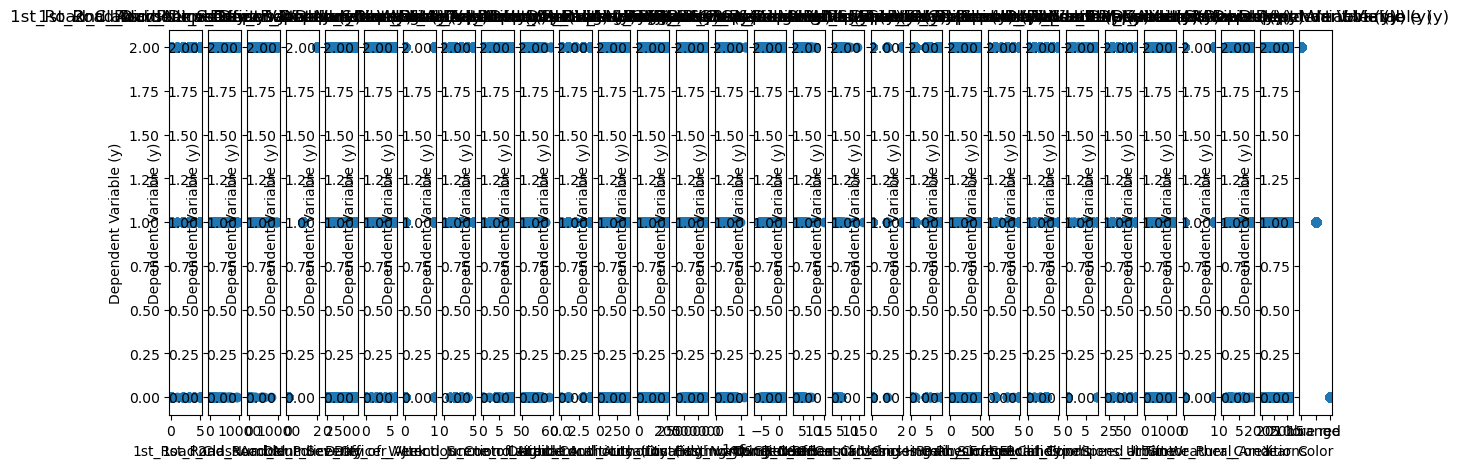

In [ ]:
# Assuming your data is stored in a pandas DataFrame
# df containing independent variables X and dependent variable y

# Let's say X is a DataFrame containing independent variables
# and y is a Series containing the dependent variable

num_cols = 2  # Number of columns in the grid
num_rows = -(-len(accident.columns) // num_cols)  # Ceiling division to calculate number of rows

fig, axs = plt.subplots(1, len(accident.columns), figsize=(15, 5))

# Loop through each column in X and create a scatter plot with y
for i, col in enumerate(accident.columns):
    axs[i].scatter(accident[col], y)
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Dependent Variable (y)')
    axs[i].set_title(f'{col} vs Dependent Variable (y)')

# Hide any empty subplots
for i in range(len(accident.columns), num_rows * num_cols):
    axs[i].axis('off')

plt.tight_layout()
plt.show()


(array([ 7279.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 12974.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

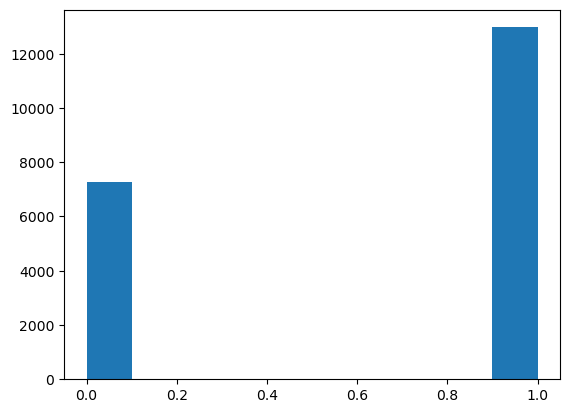

In [ ]:
plt.hist(accident['Urban_or_Rural_Area'])

(2819, 30)


(array([[ 7279.,     0.,     0.,     0.,     0., 12974.,     0.,     0.,
             0.,     0.],
        [ 7529.,     0.,     0.,     0.,     0., 15793.,     0.,     0.,
             0., 17184.]]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 2 BarContainer objects>)

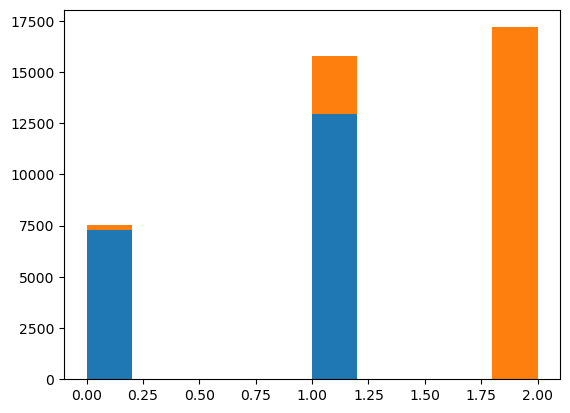

In [ ]:
serious_accidents = accident[accident['Accident_Severity'] == 1]
print(serious_accidents.shape)
plt.hist(accident[['Urban_or_Rural_Area', ]], stacked=True)

In [ ]:
urban_features = accident[accident['Urban_or_Rural_Area'] == 1]
urban_features = urban_features[['Light_Conditions', 'Weather_Conditions', 'Street_Surface_Conditions']]


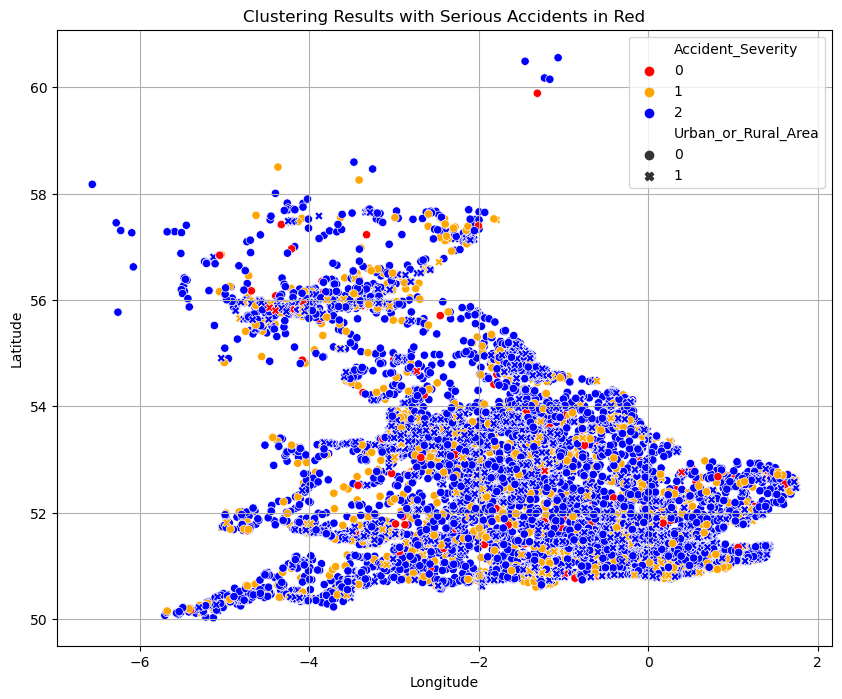

In [ ]:
plt.figure(figsize=(10, 8))


color_map = {0:'red', 1:'orange', 2:'blue'}
accident['Color'] = accident['Urban_or_Rural_Area'].map(color_map)
sns.scatterplot(
    x='Longitude',
    y='Latitude',
    hue='Accident_Severity',
    data=accident,
    palette=color_map,
    legend='full',
    sizes={1: 0.5, 0: 0.1}, style='Urban_or_Rural_Area'
) 

plt.title('Clustering Results with Serious Accidents in Red')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.legend()

In [ ]:
from sklearn_extra.cluster import KMedoids

test_features = x[['Weather_Conditions', 'Road_Type']]
severity = accident[['Accident_Severity']]
color_map = {0:'red', 1:'orange', 2:'blue'}
accident['Color'] = accident['Accident_Severity'].map(color_map)

kmedoids = KMedoids(n_clusters=3, random_state=42)
clusters = kmedoids.fit(test_features, severity)


KeyboardInterrupt: 

In [ ]:
# Get the cluster labels for each data point
cluster_labels = clusters.labels_

# Choose the cluster number you are interested in
cluster_number = 1

# Retrieve the data points that belong to the cluster
data_points_in_cluster = accident[cluster_labels == cluster_number]
data_points_in_cluster

,1st_Road_Class,1st_Road_Number,2nd_Road_Number,Accident_Severity,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,Color


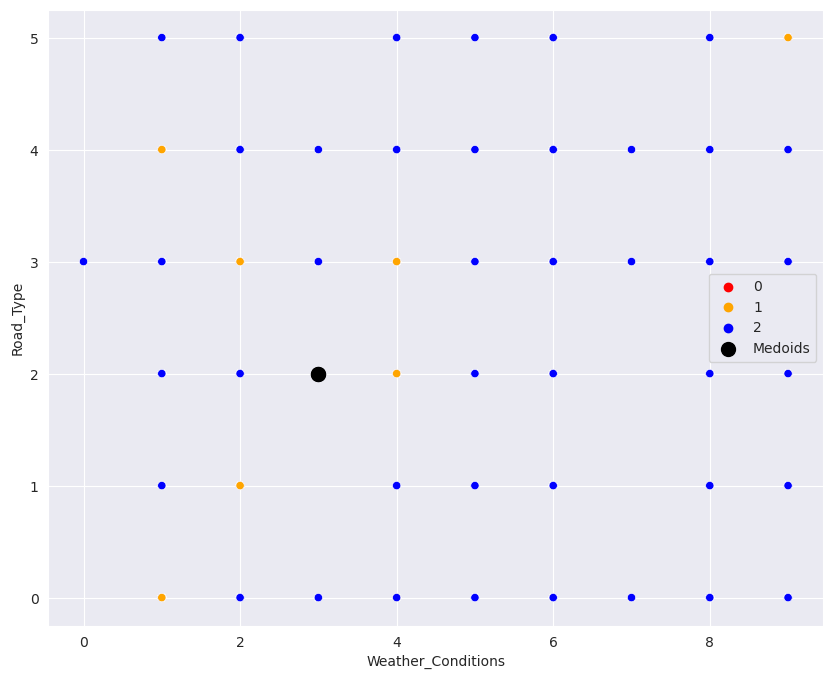

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

medoids = kmedoids.cluster_centers_

plt.figure(figsize=(10, 8))

sns.scatterplot(x='Weather_Conditions', y='Road_Type', hue='Accident_Severity', data=accident, palette=color_map, legend='full')

plt.scatter(medoids[:, 1], medoids[:, 0], s=100, c='black', label='Medoids')

# plt.title('Clustering Results with Serious Accidents in Red')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

lat_lon_features = accident[['Latitude', 'Longitude']]
severity = accident[['Accident_Severity']]

color_map = {0:'red', 1:'orange', 2:'blue'}
accident['Color'] = accident['Accident_Severity'].map(color_map)

k = 3
kmedoids = KMedoids(n_clusters=k, random_state=0)
clusters = kmedoids.fit_predict(lat_lon_features)